<a href="https://colab.research.google.com/github/OmidGhadami95/ALS_vs_GradientDescent/blob/main/Matrix_Factorization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Gradient Descent**

In [ ]:
import csv

count = 0

with open('train.csv', 'r') as file:
    csv_reader = csv.reader(file)
    next(csv_reader)  # Skip header row if present

    for row in csv_reader:
        if row[0] == '13':  # Assuming user-id is the first column
            count += 1

print(f"Number of rows with user-id '13': {count}")

Number of rows with user-id '13': 641


In [ ]:
import csv

unique_rows = set()

with open('train.csv', 'r') as file:
    csv_reader = csv.reader(file)
    next(csv_reader)  # Skip header row if present

    for row in csv_reader:
        unique_rows.add(tuple(row))  # Convert row to tuple and add to set

print(f"Number of distinct records: {len(unique_rows)}")

Number of distinct records: 65717


In [ ]:
import csv

distinct_user_ids = {}  # Using a dictionary instead of a set

with open('train.csv', 'r') as file:
    csv_reader = csv.reader(file)
    next(csv_reader)  # Skip header row if present

    for row in csv_reader:
        user_id = row[0]  # Assuming user-id is the first column
        distinct_user_ids[user_id] = True  # Using the user_id as a key in the dictionary

print(f"Number of distinct user-ids in train.csv (excluding index): {len(distinct_user_ids)}")

Number of distinct user-ids in train.csv (excluding index): 306


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Step 1: Load the data
df = pd.read_csv('train.csv')

# Step 2: Split the data (90% for training, 10% for validation)
train_df, val_df = train_test_split(df, test_size=0.1, random_state=42)

# Step 3: Save the training and validation sets to separate CSV files
train_df.to_csv('train_split.csv', index=False)
val_df.to_csv('validation_split.csv', index=False)

print("Training and validation datasets created successfully!")


Training and validation datasets created successfully!


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Step 1: Load the data
df = pd.read_csv('train.csv')

# Step 2: Split the data (90% for training, 10% for validation)
train_df, val_df = train_test_split(df, test_size=0.1, random_state=42)

# Step 3: Find out how many records each CSV has
print(f"Training set records: {len(train_df)}")
print(f"Validation set records: {len(val_df)}")

# Step 4: Save the training and validation sets to separate CSV files
train_df.to_csv('train_split.csv', index=False)
val_df.to_csv('validation_split.csv', index=False)

print("Training and validation datasets created successfully!")


Training set records: 59145
Validation set records: 6572
Training and validation datasets created successfully!


In [ ]:
import pandas as pd

# Load the validation split data
val_df = pd.read_csv('validation_split.csv')

# Drop the third column (assuming it's the column at index 2)
val_df = val_df.drop(val_df.columns[2], axis=1)

# Save the new DataFrame without the third column to a new CSV file
val_df.to_csv('validation_split_no_third_column.csv', index=False)

print("New validation_split_no_third_column.csv created without the third column!")


New validation_split_no_third_column.csv created without the third column!


Epoch 1/100, LR: 0.100000, Train Loss (MAE): 0.6304, Validation Loss (MAE): 0.6724
Epoch 2/100, LR: 0.100000, Train Loss (MAE): 0.6299, Validation Loss (MAE): 0.6722
Epoch 3/100, LR: 0.100000, Train Loss (MAE): 0.6283, Validation Loss (MAE): 0.6717
Epoch 4/100, LR: 0.100000, Train Loss (MAE): 0.6258, Validation Loss (MAE): 0.6710
Epoch 5/100, LR: 0.100000, Train Loss (MAE): 0.6223, Validation Loss (MAE): 0.6700
Epoch 6/100, LR: 0.100000, Train Loss (MAE): 0.6179, Validation Loss (MAE): 0.6687
Epoch 7/100, LR: 0.100000, Train Loss (MAE): 0.6131, Validation Loss (MAE): 0.6675
Epoch 8/100, LR: 0.070000, Train Loss (MAE): 0.6071, Validation Loss (MAE): 0.6659
Epoch 9/100, LR: 0.070000, Train Loss (MAE): 0.6027, Validation Loss (MAE): 0.6651
Epoch 10/100, LR: 0.070000, Train Loss (MAE): 0.5983, Validation Loss (MAE): 0.6643
Epoch 11/100, LR: 0.070000, Train Loss (MAE): 0.5938, Validation Loss (MAE): 0.6635
Epoch 12/100, LR: 0.070000, Train Loss (MAE): 0.5892, Validation Loss (MAE): 0.6626
E

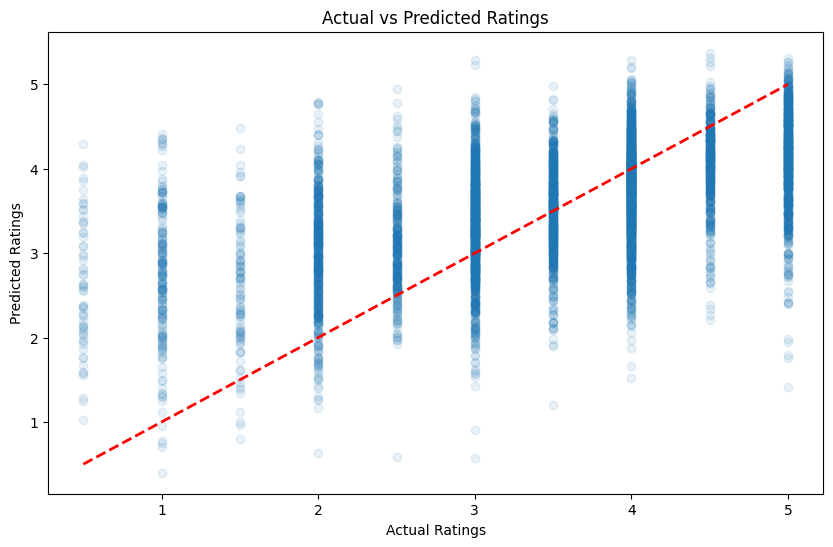

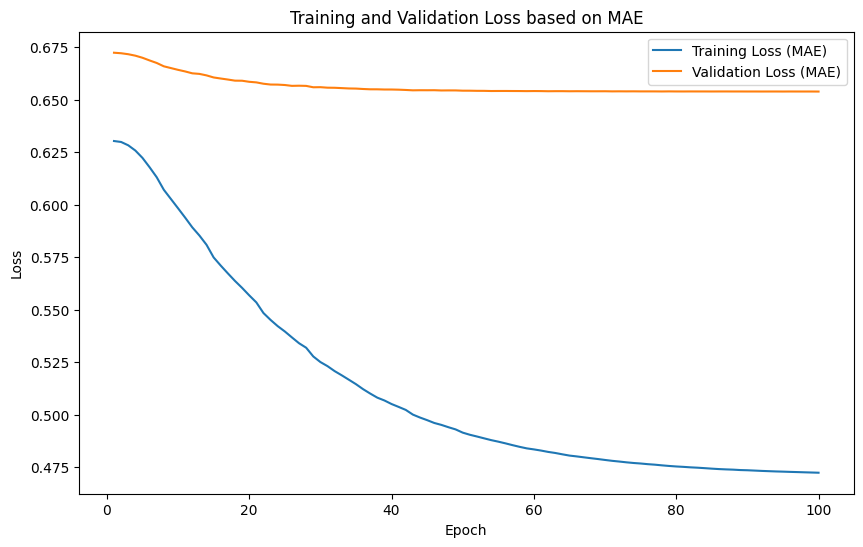

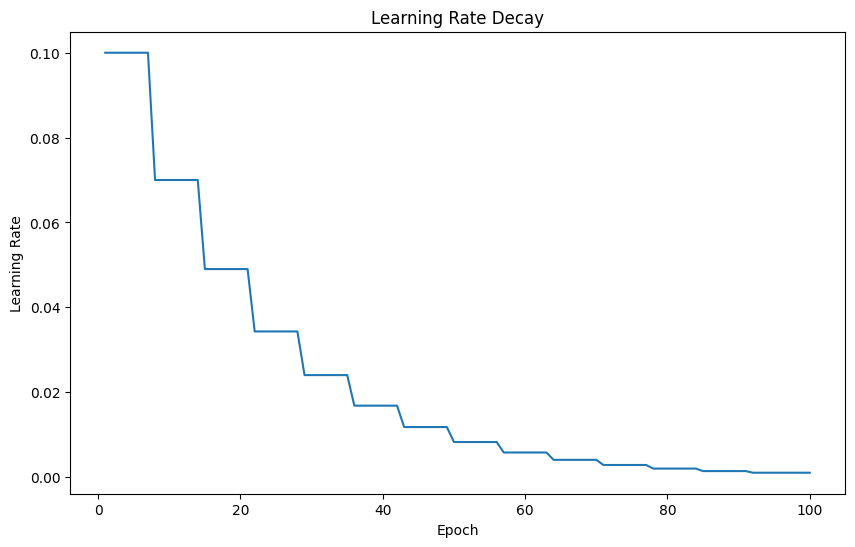

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Load the Data
train_data = pd.read_csv('/content/train_split.csv')
validation_data = pd.read_csv('/content/validation_split.csv')
train_data.columns = ['userId', 'movieId', 'rating']
validation_data.columns = ['userId', 'movieId', 'rating']

# Get the number of users and movies
num_users = train_data['userId'].nunique()
num_movies = train_data['movieId'].nunique()

# Create mappings for user and movie IDs
user_id_map = {id: i for i, id in enumerate(train_data['userId'].unique())}
movie_id_map = {id: i for i, id in enumerate(train_data['movieId'].unique())}

# Create ratings matrix
ratings_matrix = np.zeros((num_users, num_movies))
for _, row in train_data.iterrows():
    user = user_id_map[row['userId']]
    movie = movie_id_map[row['movieId']]
    ratings_matrix[user, movie] = row['rating']

# Center the ratings
user_means = np.mean(ratings_matrix, axis=1, where=ratings_matrix != 0)
movie_means = np.mean(ratings_matrix, axis=0, where=ratings_matrix != 0)
global_mean = np.mean(ratings_matrix[ratings_matrix != 0])

# Create centered ratings matrix
centered_ratings_matrix = np.zeros_like(ratings_matrix)
for i in range(num_users):
    for j in range(num_movies):
        if ratings_matrix[i, j] != 0:
            centered_ratings_matrix[i, j] = ratings_matrix[i, j] - user_means[i] - movie_means[j] + global_mean

# Update train_data with centered ratings
train_data['centered_rating'] = train_data.apply(lambda row:
    centered_ratings_matrix[user_id_map[row['userId']], movie_id_map[row['movieId']]], axis=1)

# Update validation_data with centered ratings
validation_data['centered_rating'] = validation_data.apply(lambda row:
    row['rating'] - user_means[user_id_map.get(row['userId'], 0)] -
    movie_means[movie_id_map.get(row['movieId'], 0)] + global_mean
    if row['userId'] in user_id_map and row['movieId'] in movie_id_map else 0, axis=1)

# Step 2: Initialize matrices for latent factors
num_factors = 100
np.random.seed(42)
user_factors = np.random.normal(scale=0.1, size=(num_users, num_factors))
movie_factors = np.random.normal(scale=0.1, size=(num_movies, num_factors))

# Step 3: Define the Matrix Factorization model
def predict(user, movie):
    if user in user_id_map and movie in movie_id_map:
        return np.dot(user_factors[user_id_map[user]], movie_factors[movie_id_map[movie]])
    return global_mean  # Return global mean for unknown user-movie pairs

# Step 4: Define the loss function (Mean Absolute Error)
def compute_loss(data):
    predictions = np.array([predict(row['userId'], row['movieId']) for _, row in data.iterrows()])
    return np.mean(np.abs(predictions - data['centered_rating']))

# Step 5: Implement gradient descent with dynamic learning rate and gradient clipping
initial_learning_rate = 0.1  # Reduced learning rate for MAE
min_learning_rate = 0.001
decay_factor = 0.7
decay_steps = 7  # Number of epochs after which to decay the learning rate

regularization = 0.2
epochs = 100
batch_size = 2000

# Lists to store loss values and learning rates
train_losses = []
val_losses = []
learning_rates = []

def get_learning_rate(epoch):
    return max(initial_learning_rate * (decay_factor ** (epoch // decay_steps)), min_learning_rate)

def clip_gradient(gradient, max_norm=1.0):
    norm = np.linalg.norm(gradient)
    if norm > max_norm:
        return gradient * (max_norm / norm)
    return gradient

for epoch in range(epochs):
    learning_rate = get_learning_rate(epoch)
    learning_rates.append(learning_rate)

    for start in range(0, len(train_data), batch_size):
        end = start + batch_size
        batch = train_data.iloc[start:end]

        for _, row in batch.iterrows():
            user, movie, rating = row['userId'], row['movieId'], row['centered_rating']
            prediction = predict(user, movie)
            error = prediction - rating

            # Compute gradients (sign of error for MAE)
            gradient_direction = np.sign(error)
            user_gradient = gradient_direction * movie_factors[movie_id_map[movie]] + regularization * user_factors[user_id_map[user]]
            movie_gradient = gradient_direction * user_factors[user_id_map[user]] + regularization * movie_factors[movie_id_map[movie]]

            # Clip gradients
            user_gradient = clip_gradient(user_gradient)
            movie_gradient = clip_gradient(movie_gradient)

            # Update latent factors
            user_factors[user_id_map[user]] -= learning_rate * user_gradient
            movie_factors[movie_id_map[movie]] -= learning_rate * movie_gradient

    # Compute and store loss for every epoch
    train_loss = compute_loss(train_data)
    val_loss = compute_loss(validation_data)
    train_losses.append(train_loss)
    val_losses.append(val_loss)
    print(f"Epoch {epoch+1}/{epochs}, LR: {learning_rate:.6f}, Train Loss (MAE): {train_loss:.4f}, Validation Loss (MAE): {val_loss:.4f}")

# Step 6: Make predictions on validation set
validation_data['predicted_rating'] = validation_data.apply(lambda row:
    predict(row['userId'], row['movieId']) +
    user_means[user_id_map.get(row['userId'], 0)] +
    movie_means[movie_id_map.get(row['movieId'], 0)] -
    global_mean, axis=1)

# Step 7: Compute final MAE on validation set
mae = np.mean(np.abs(validation_data['predicted_rating'] - validation_data['rating']))
print(f"Final MAE on validation set: {mae:.4f}")

# Step 8: Visualize results
plt.figure(figsize=(10, 6))
plt.scatter(validation_data['rating'], validation_data['predicted_rating'], alpha=0.1)
plt.plot([validation_data['rating'].min(), validation_data['rating'].max()],
         [validation_data['rating'].min(), validation_data['rating'].max()],
         'r--', lw=2)
plt.xlabel('Actual Ratings')
plt.ylabel('Predicted Ratings')
plt.title('Actual vs Predicted Ratings')
plt.show()

# Step 9: Plot training and validation loss
plt.figure(figsize=(10, 6))
epochs_range = range(1, epochs + 1)
plt.plot(epochs_range, train_losses, label='Training Loss (MAE)')
plt.plot(epochs_range, val_losses, label='Validation Loss (MAE)')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss based on MAE')
plt.legend()
plt.show()

# Step 10: Plot learning rate decay
plt.figure(figsize=(10, 6))
plt.plot(range(1, epochs + 1), learning_rates)
plt.xlabel('Epoch')
plt.ylabel('Learning Rate')
plt.title('Learning Rate Decay')
plt.show()

In [ ]:
# Step 8: Save predictions to CSV
prediction_df = validation_data[['userId', 'movieId', 'rating', 'predicted_rating']]
prediction_df.to_csv('predicted_ratings.csv', index=False)
print("Predictions saved to 'predicted_ratings.csv'")

Predictions saved to 'predicted_ratings.csv'


In [ ]:
import pandas as pd
from sklearn.metrics import mean_absolute_error, r2_score

# Step 1: Load the CSV files
prediction_df = pd.read_csv('predicted_ratings.csv')
validation_df = pd.read_csv('/content/validation_split.csv')

# Step 2: Extract the predicted and actual values (third column in each file)
predicted_values = prediction_df.iloc[:, 3]  # Third column
actual_values = validation_df.iloc[:, 2]     # Third column

# Step 3: Calculate loss (using mean absolute error for regression tasks)
mse_loss = mean_absolute_error(actual_values, predicted_values)
print(f"Mean Absolute Error (Loss): {mse_loss:.4f}")

# Step 4: Calculate R-squared score (another metric for regression tasks)
r2 = r2_score(actual_values, predicted_values)
print(f"R-squared: {r2:.4f}")

Mean Absolute Error (Loss): 0.6539
R-squared: 0.3060


In [ ]:
# Step 7: Load the new test data
new_test_file = '/content/test_without_rating.csv'
new_test_data = pd.read_csv(new_test_file)
new_test_data.columns = ['userId', 'movieId']

# Step 8: Predict ratings for the new test set
new_test_data['predicted_rating'] = new_test_data.apply(lambda row:
    predict(row['userId'], row['movieId']) +
    user_means[user_id_map.get(row['userId'], 0)] +
    movie_means[movie_id_map.get(row['movieId'], 0)] -
    global_mean, axis=1)

# Step 9: Create a new DataFrame with predictions and save to CSV
new_test_predictions_df = new_test_data.copy()

# Round the predicted ratings to 3 decimal places
new_test_predictions_df['predicted_rating'] = new_test_predictions_df['predicted_rating'].round(3)

# Ensure predicted ratings are within the valid range (0.5 to 5)
new_test_predictions_df['predicted_rating'] = new_test_predictions_df['predicted_rating'].clip(0.5, 5)

# Save the predictions to a new CSV file
new_test_predictions_df.to_csv('test_predictions_gradient_mae.csv', index=False)
print("New test predictions saved to 'test_predictions_gradient_mae.csv'.")

# Step 10: Display the first few rows of the predictions
print(new_test_predictions_df.head())

# Step 11: Provide some statistics about the predictions
print("\nPrediction Statistics:")
print(new_test_predictions_df['predicted_rating'].describe())

# Step 12: Save the final predictions to a TXT file
with open('predictions_gradient.txt', 'w') as f:
    for _, row in new_test_predictions_df.iterrows():
        f.write(f"{row['userId']},{row['movieId']},{row['predicted_rating']:.3f}\n")

print("New test predictions saved to 'predictions_gradient.txt'.")

New test predictions saved to 'test_predictions_gradient_mae.csv'.
   userId  movieId  predicted_rating
0     202     1204             3.853
1     103      367             3.858
2      74      698             4.219
3       2     1935             2.970
4      49     2220             3.562

Prediction Statistics:
count    7302.000000
mean        3.585570
std         0.695461
min         0.500000
25%         3.149000
50%         3.652000
75%         4.080000
max         5.000000
Name: predicted_rating, dtype: float64
New test predictions saved to 'predictions_gradient.txt'.


In [ ]:
# Step 7: Load the new test data
new_test_file = '/content/test_without_rating.csv'
new_test_data = pd.read_csv(new_test_file)
new_test_data.columns = ['userId', 'movieId']

# Step 8: Predict ratings for the new test set
new_test_data['predicted_rating'] = new_test_data.apply(lambda row:
    predict(row['userId'], row['movieId']) +
    user_means[user_id_map.get(row['userId'], 0)] +
    movie_means[movie_id_map.get(row['movieId'], 0)] -
    global_mean, axis=1)

# Step 9: Create a new DataFrame with predictions and save to CSV
new_test_predictions_df = new_test_data.copy()

# Round the predicted ratings to 3 decimal places
new_test_predictions_df['predicted_rating'] = new_test_predictions_df['predicted_rating'].round(3)

# Ensure predicted ratings are within the valid range (0.5 to 5)
new_test_predictions_df['predicted_rating'] = new_test_predictions_df['predicted_rating'].clip(0.5, 5)

# Save the full predictions to a CSV file
new_test_predictions_df.to_csv('test_predictions_gradient_mae.csv', index=False)
print("Full test predictions saved to 'test_predictions_gradient_mae.csv'.")

# Save only the predicted ratings to a new CSV file
predicted_ratings_only = new_test_predictions_df['predicted_rating']
predicted_ratings_only.to_csv('predicted_ratings_only.csv', index=False, header=False)
print("Predicted ratings only saved to 'predicted_ratings_only.csv'.")

# Step 10: Display the first few rows of the predictions
print(new_test_predictions_df.head())

# Step 11: Provide some statistics about the predictions
print("\nPrediction Statistics:")
print(new_test_predictions_df['predicted_rating'].describe())

# Step 12: Save the final full predictions to a TXT file
with open('predictions_gradient.txt', 'w') as f:
    for _, row in new_test_predictions_df.iterrows():
        f.write(f"{row['userId']},{row['movieId']},{row['predicted_rating']:.3f}\n")

print("Full test predictions saved to 'predictions_gradient.txt'.")

# Save only the predicted ratings to a new TXT file
with open('Gradient_predicted_ratings_only.txt', 'w') as f:
    for rating in new_test_predictions_df['predicted_rating']:
        f.write(f"{rating:.3f}\n")

print("Predicted ratings only saved to 'Gradient_predicted_ratings_only.txt'.")

Full test predictions saved to 'test_predictions_gradient_mae.csv'.
Predicted ratings only saved to 'predicted_ratings_only.csv'.
   userId  movieId  predicted_rating
0     202     1204             3.853
1     103      367             3.858
2      74      698             4.219
3       2     1935             2.970
4      49     2220             3.562

Prediction Statistics:
count    7302.000000
mean        3.585570
std         0.695461
min         0.500000
25%         3.149000
50%         3.652000
75%         4.080000
max         5.000000
Name: predicted_rating, dtype: float64
Full test predictions saved to 'predictions_gradient.txt'.
Predicted ratings only saved to 'Gradient_predicted_ratings_only.txt'.


# **ALS**

Iteration 1/50, MAE: 0.7795
Iteration 2/50, MAE: 0.7540
Iteration 3/50, MAE: 0.7424
Iteration 4/50, MAE: 0.7345
Iteration 5/50, MAE: 0.7288
Iteration 6/50, MAE: 0.7244
Iteration 7/50, MAE: 0.7208
Iteration 8/50, MAE: 0.7180
Iteration 9/50, MAE: 0.7158
Iteration 10/50, MAE: 0.7139
Iteration 11/50, MAE: 0.7123
Iteration 12/50, MAE: 0.7108
Iteration 13/50, MAE: 0.7095
Iteration 14/50, MAE: 0.7083
Iteration 15/50, MAE: 0.7073
Iteration 16/50, MAE: 0.7064
Iteration 17/50, MAE: 0.7056
Iteration 18/50, MAE: 0.7049
Iteration 19/50, MAE: 0.7042
Iteration 20/50, MAE: 0.7035
Iteration 21/50, MAE: 0.7029
Iteration 22/50, MAE: 0.7024
Iteration 23/50, MAE: 0.7019
Iteration 24/50, MAE: 0.7015
Iteration 25/50, MAE: 0.7011
Iteration 26/50, MAE: 0.7007
Iteration 27/50, MAE: 0.7003
Iteration 28/50, MAE: 0.7000
Iteration 29/50, MAE: 0.6997
Iteration 30/50, MAE: 0.6995
Iteration 31/50, MAE: 0.6992
Iteration 32/50, MAE: 0.6990
Iteration 33/50, MAE: 0.6988
Iteration 34/50, MAE: 0.6986
Iteration 35/50, MAE: 0

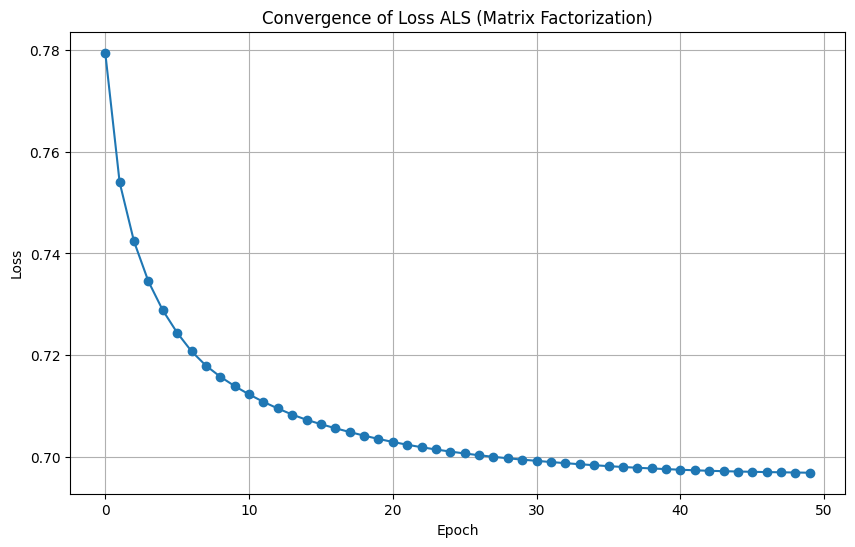

Final MAE on validation set: 0.6969
Estimations saved to 'estimations_als.csv'.


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def prepare_datasets(training_file, validation_file):
    """
    Prepare training and validation datasets from CSV files.
    """
    training_set = pd.read_csv(training_file)
    validation_set = pd.read_csv(validation_file)
    training_set.columns = ['user', 'item', 'score']
    validation_set.columns = ['user', 'item', 'score']

    # Get the number of users and items
    user_count = max(training_set['user'].max(), validation_set['user'].max()) + 1
    item_count = max(training_set['item'].max(), validation_set['item'].max()) + 1

    # Create mappings for user and item IDs
    user_index = {id: i for i, id in enumerate(training_set['user'].unique())}
    item_index = {id: i for i, id in enumerate(training_set['item'].unique())}

    # Create the score matrix S
    S = np.zeros((user_count, item_count))
    for row in training_set.itertuples():
        S[user_index[row.user], item_index[row.item]] = row.score

    # Center the scores
    user_averages = np.mean(S, axis=1, where=S != 0)
    item_averages = np.mean(S, axis=0, where=S != 0)
    overall_average = np.mean(S[S != 0])

    # Create centered score matrix
    centered_S = np.zeros_like(S)
    for i in range(user_count):
        for j in range(item_count):
            if S[i, j] != 0:
                centered_S[i, j] = S[i, j] - user_averages[i] - item_averages[j] + overall_average

    # Update training_set with centered scores
    training_set['centered_score'] = training_set.apply(lambda row:
        centered_S[user_index[row['user']], item_index[row['item']]], axis=1)

    # Update validation_set with centered scores
    validation_set['centered_score'] = validation_set.apply(lambda row:
        row['score'] - user_averages[user_index.get(row['user'], 0)] -
        item_averages[item_index.get(row['item'], 0)] + overall_average
        if row['user'] in user_index and row['item'] in item_index else 0, axis=1)

    return centered_S, training_set, validation_set, user_count, item_count, user_averages, item_averages, overall_average, user_index, item_index

def estimate_score(P, Q, data, user_averages, item_averages, overall_average, user_index, item_index):
    """
    Estimate scores for the user-item pairs in data.
    """
    estimations = []
    for row in data.itertuples():
        user, item = row.user, row.item
        if user in user_index and item in item_index:
            user_idx, item_idx = user_index[user], item_index[item]
            score_est = np.dot(P[user_idx, :], Q[item_idx, :])
            # Add back the user and item averages, and subtract the overall average
            score_est += user_averages[user_idx] + item_averages[item_idx] - overall_average
        else:
            score_est = overall_average
        estimations.append(score_est)

    return np.array(estimations)

def matrix_factorization(S, validation_set, latent_factors=200, lambda_reg=0.0001, iterations=50, user_index=None, item_index=None):
    """
    Matrix factorization using Alternating Least Squares (ALS) with MAE loss.
    """
    user_count, item_count = S.shape

    # Initialize user and item matrices with random values
    P = np.random.normal(scale=1./latent_factors, size=(user_count, latent_factors))
    Q = np.random.normal(scale=1./latent_factors, size=(item_count, latent_factors))

    # Create binary matrices to indicate observed scores
    observed_S = S.copy()
    observed_S[observed_S != 0] = 1

    # Store the MAE for each iteration
    error_history = []

    for iteration in range(iterations):
        # Update user latent factors
        for i in range(user_count):
            Q_i = Q[observed_S[i, :] > 0]
            S_i = S[i, observed_S[i, :] > 0]
            A = np.dot(Q_i.T, Q_i) + lambda_reg * np.eye(latent_factors)
            b = np.dot(Q_i.T, S_i)
            P[i] = np.linalg.solve(A, b)

        # Update item latent factors
        for j in range(item_count):
            P_j = P[observed_S[:, j] > 0]
            S_j = S[observed_S[:, j] > 0, j]
            A = np.dot(P_j.T, P_j) + lambda_reg * np.eye(latent_factors)
            b = np.dot(P_j.T, S_j)
            Q[j] = np.linalg.solve(A, b)

        # Calculate MAE on validation set
        validation_estimations = estimate_score(P, Q, validation_set, user_averages, item_averages, overall_average, user_index, item_index)
        mae = np.mean(np.abs(validation_set['score'] - validation_estimations))
        error_history.append(mae)

        print(f'Iteration {iteration + 1}/{iterations}, MAE: {mae:.4f}')

    return P, Q, error_history

def visualize_error(error_history, filename='mae_convergence_mf.png'):
    """
    Visualize the convergence of the MAE.
    """
    plt.figure(figsize=(10, 6))
    plt.plot(range(len(error_history)), error_history, marker='o', linestyle='-')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title('Convergence of Loss ALS (Matrix Factorization)')
    plt.grid(True)
    plt.savefig(filename)
    plt.show()

# Step 1: Prepare the data
training_file = '/content/train_split.csv'  # Replace with your training file path
validation_file = '/content/validation_split.csv'    # Replace with your validation file path
S, training_set, validation_set, user_count, item_count, user_averages, item_averages, overall_average, user_index, item_index = prepare_datasets(training_file, validation_file)

# Step 2: Apply matrix factorization to find latent factors
P, Q, error_history = matrix_factorization(S, validation_set, latent_factors=200, lambda_reg=0.0001, iterations=50, user_index=user_index, item_index=item_index)

# Step 3: Visualize the convergence of the MAE
visualize_error(error_history)

# Step 4: Estimate scores for the validation set
final_estimations = estimate_score(P, Q, validation_set, user_averages, item_averages, overall_average, user_index, item_index)

# Step 5: Calculate final MAE on validation set
final_mae = np.mean(np.abs(validation_set['score'] - final_estimations))
print(f"Final MAE on validation set: {final_mae:.4f}")

# Step 6: Save estimations to a file
estimations_df = pd.DataFrame({
    'user': validation_set['user'],
    'item': validation_set['item'],
    'estimated_score': final_estimations
})
estimations_df.to_csv('estimations_als.csv', index=False)
print("Estimations saved to 'estimations_als.csv'.")

**Prediction Function**

In [ ]:
# Step 7: Load the new test data
new_test_file = '/content/test_without_rating.csv'
new_test_data = pd.read_csv(new_test_file)
new_test_data.columns = ['user', 'item']

# Step 8: Predict ratings for the new test set
new_test_predictions = estimate_score(P, Q, new_test_data, user_averages, item_averages, overall_average, user_index, item_index)

# Step 9: Create a new DataFrame with predictions and save to CSV
new_test_predictions_df = pd.DataFrame({
    'user': new_test_data['user'],
    'item': new_test_data['item'],
    'predicted_rating': new_test_predictions
})

# Round the predicted ratings to 3 decimal places
new_test_predictions_df['predicted_rating'] = new_test_predictions_df['predicted_rating'].round(3)

# Ensure predicted ratings are within the valid range (0.5 to 5)
new_test_predictions_df['predicted_rating'] = new_test_predictions_df['predicted_rating'].clip(0.5, 5)

# Step 10: Save the predictions to a CSV file
new_test_predictions_df.to_csv('test_predictions_mf_mae.csv', index=False)
print("New test predictions saved to 'test_predictions_mf_mae.csv'.")

# Step 11: Print summary statistics of the predictions
print(new_test_predictions_df['predicted_rating'].describe())

# Step 12: Save the final predictions to a TXT file
with open('predictions_als.txt', 'w') as f:
    for _, row in new_test_predictions_df.iterrows():
        f.write(f"{row['user']},{row['item']},{row['predicted_rating']:.3f}\n")

print("New test predictions saved to 'predictions_mf_mae.txt'.")

New test predictions saved to 'test_predictions_mf_mae.csv'.
count    7302.000000
mean        3.579222
std         0.760208
min         0.500000
25%         3.093000
50%         3.631000
75%         4.118750
max         5.000000
Name: predicted_rating, dtype: float64
New test predictions saved to 'predictions_mf_mae.txt'.


In [ ]:
# Step 7: Load the new test data
new_test_file = '/content/test_without_rating.csv'
new_test_data = pd.read_csv(new_test_file)
new_test_data.columns = ['user', 'item']

# Step 8: Predict ratings for the new test set
new_test_predictions = estimate_score(P, Q, new_test_data, user_averages, item_averages, overall_average, user_index, item_index)

# Step 9: Create a new DataFrame with predictions and save to CSV
new_test_predictions_df = pd.DataFrame({
    'user': new_test_data['user'],
    'item': new_test_data['item'],
    'predicted_rating': new_test_predictions
})

# Round the predicted ratings to 3 decimal places
new_test_predictions_df['predicted_rating'] = new_test_predictions_df['predicted_rating'].round(3)

# Ensure predicted ratings are within the valid range (0.5 to 5)
new_test_predictions_df['predicted_rating'] = new_test_predictions_df['predicted_rating'].clip(0.5, 5)

# Step 10: Save the full predictions to a CSV file
new_test_predictions_df.to_csv('test_predictions_mf_mae.csv', index=False)
print("Full test predictions saved to 'test_predictions_mf_mae.csv'.")

# Save only the predicted ratings to a new CSV file
predicted_ratings_only = new_test_predictions_df['predicted_rating']
predicted_ratings_only.to_csv('predicted_ratings_only.csv', index=False, header=False)
print("Predicted ratings only saved to 'predicted_ratings_only.csv'.")

# Step 11: Print summary statistics of the predictions
print(new_test_predictions_df['predicted_rating'].describe())

# Step 12: Save the final full predictions to a TXT file
with open('predictions_mf_mae.txt', 'w') as f:
    for _, row in new_test_predictions_df.iterrows():
        f.write(f"{row['user']},{row['item']},{row['predicted_rating']:.3f}\n")

print("Full test predictions saved to 'predictions_mf_mae.txt'.")

# Save only the predicted ratings to a new TXT file
with open('ALS_predicted_ratings_only.txt', 'w') as f:
    for rating in new_test_predictions_df['predicted_rating']:
        f.write(f"{rating:.3f}\n")

print("Predicted ratings only saved to 'ALS_predicted_ratings_only.txt'.")

Full test predictions saved to 'test_predictions_mf_mae.csv'.
Predicted ratings only saved to 'predicted_ratings_only.csv'.
count    7302.000000
mean        3.579222
std         0.760208
min         0.500000
25%         3.093000
50%         3.631000
75%         4.118750
max         5.000000
Name: predicted_rating, dtype: float64
Full test predictions saved to 'predictions_mf_mae.txt'.
Predicted ratings only saved to 'ALS_predicted_ratings_only.txt'.
